In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
df = pd.read_csv('income.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Main    2093 non-null   float64
 1   Sektor  2093 non-null   object 
dtypes: float64(1), object(1)
memory usage: 32.8+ KB


**Deal with Numeric Data**

Clean errors and outliers

In [ ]:
#Convert non-numeric to N/A
numeric_df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
print(numeric_df.dtypes)

Main Income    float64
Side Income    float64
dtype: object


In [ ]:
print(numeric_df['Main Income'].median())
print(numeric_df['Side Income'].mean())

3500.0
289.00173439048564


In [ ]:
print(numeric_df.isnull().sum())

Main Income    247
Side Income     75
dtype: int64


Median Imputation(Clean error data)

In [ ]:
numeric_df['Main Income'].fillna((numeric_df['Main Income'].median()), inplace=True)
numeric_df['Side Income'].fillna((numeric_df['Side Income'].mean()), inplace=True)

In [ ]:
print(numeric_df.isnull().sum())

Main Income    0
Side Income    0
dtype: int64


In [ ]:
numeric_df.to_csv('income_clean.csv')

In [ ]:
print(numeric_df['Main Income'].median())
print(numeric_df['Side Income'].mean())

3500.0
289.00173439048564


Box Plot (Clean Outliers)

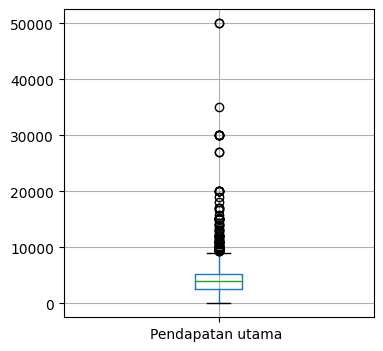

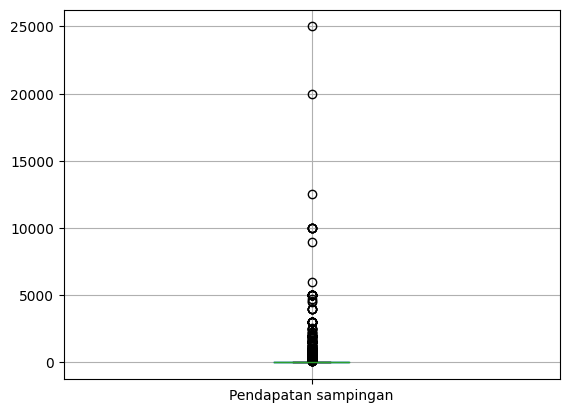

In [ ]:
plt.figure(figsize=(4,4))
for i, col in enumerate(numeric_df.columns):
  numeric_df.boxplot(column = numeric_df.columns[i] )
  plt.show()

Z-score remove outliers

In [ ]:
z1 = np.abs(stats.zscore(numeric_df['Pendapatan utama ']))
outliers1 = numeric_df[z1 > 3]
z2 = np.abs(stats.zscore(numeric_df['Pendapatan sampingan']))
outliers2 = numeric_df[z2> 3]
print(outliers1)
print(outliers2)

      Pendapatan utama   Pendapatan sampingan
135             18000.0                3000.0
176             50000.0                   0.0
239             30000.0                   0.0
295             17000.0                2500.0
321             50000.0                   0.0
426             19000.0                   0.0
444             30000.0                   0.0
501             30000.0                2500.0
506             20000.0               10000.0
619             15700.0                   0.0
841             17000.0                   0.0
1129            20000.0                   0.0
1160            30000.0                5000.0
1212            20000.0                   0.0
1272            35000.0                   0.0
1361            30000.0                   0.0
1454            29999.0                   0.0
1553            17000.0                   0.0
1571            16700.0                2000.0
1573            27100.0                   0.0
1998            20000.0           

In [ ]:
a = df[df['Sektor']=='a. Awam']
b = df[df['Sektor']=='b. Swasta']
c = df[df['Sektor']=='c. Badan Bukan Kerajaan (NGO)']
d = df[df['Sektor']=='d. Tidak Berkenaan']

In [ ]:
d.drop(['Sektor'], axis=1)

,Main
6,3500.0
7,3000.0
12,2500.0
20,500.0
28,0.0
...,...
2051,0.0
2052,6000.0
2053,1000.0
2080,2000.0


In [ ]:
d.to_csv('d.csv',index=False)

In [ ]:
print(df.isnull().sum())

Status Pekerjaan KIR    0
Pendapatan utama        0
Pendapatan sampingan    0
Peruntukan masa         0
dtype: int64


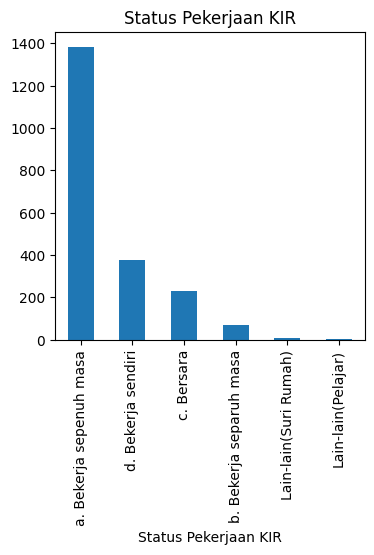

In [ ]:
graph = df['Status Pekerjaan KIR'].value_counts()
graph.plot(kind='bar',figsize=(4,4))
plt.title('Status Pekerjaan KIR')
plt.show()

Correlation Test

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('income.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 3 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Faktor Penjanaan Ekonomi                       2093 non-null   float64
 1   Pengurusan Masa                                2093 non-null   float64
 2   Aktiviti Menjana Pendapatan Kekayaan Keluarga  2093 non-null   float64
dtypes: float64(3)
memory usage: 49.2 KB


In [ ]:
result1 = scipy.stats.spearmanr(data['Faktor Penjanaan Ekonomi'],data['Aktiviti Menjana Pendapatan Kekayaan Keluarga'])
result2 = scipy.stats.spearmanr(data['Pengurusan Masa'],data['Aktiviti Menjana Pendapatan Kekayaan Keluarga'])
result3= scipy.stats.pearsonr(data['Faktor Penjanaan Ekonomi'],data['Aktiviti Menjana Pendapatan Kekayaan Keluarga'])
result4= scipy.stats.pearsonr(data['Pengurusan Masa'],data['Aktiviti Menjana Pendapatan Kekayaan Keluarga'])
result5= scipy.stats.pearsonr(data['Faktor Penjanaan Ekonomi'],data['Pengurusan Masa'])
result6= scipy.stats.spearmanr(data['Faktor Penjanaan Ekonomi'],data['Pengurusan Masa'])
print(result1)
print(result2)
print(result3)
print(result4)
print(result5)
print(result6)
#plt.figure(figsize=(6, 6))
#corr_map = sns.heatmap(corr, annot=True)

SignificanceResult(statistic=0.355241917412794, pvalue=2.739697075553063e-63)
SignificanceResult(statistic=0.08735874149660203, pvalue=6.284443943281858e-05)
PearsonRResult(statistic=0.396465906153162, pvalue=9.893684316333736e-80)
PearsonRResult(statistic=0.10922095395550221, pvalue=5.477340077458578e-07)
PearsonRResult(statistic=0.132193344686425, pvalue=1.2727319255355955e-09)
SignificanceResult(statistic=0.12887495820319333, pvalue=3.2764929238212406e-09)


In [ ]:
print(data.corr(method='spearman'))

                                               Faktor Penjanaan Ekonomi  \
Faktor Penjanaan Ekonomi                                       1.000000   
Pengurusan Masa                                                0.128875   
Aktiviti Menjana Pendapatan Kekayaan Keluarga                  0.355242   

                                               Pengurusan Masa  \
Faktor Penjanaan Ekonomi                              0.128875   
Pengurusan Masa                                       1.000000   
Aktiviti Menjana Pendapatan Kekayaan Keluarga         0.087359   

                                               Aktiviti Menjana Pendapatan Kekayaan Keluarga  
Faktor Penjanaan Ekonomi                                                            0.355242  
Pengurusan Masa                                                                     0.087359  
Aktiviti Menjana Pendapatan Kekayaan Keluarga                                       1.000000  
